# Data cleaning and data split

In [1]:
# Loading the necessary data for the classification methods.
#General libraries
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import seaborn as sns

# Logistic Regression, KNN, Classification Trees libraries, Random Forest and Boosted Forest
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import statsmodels.api as sm
from mord import LogisticIT
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from dmba import backward_elimination, forward_selection, stepwise_selection

# Evaluation Metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, classification_report
from sklearn.metrics import accuracy_score
from dmba.metric import AIC_score
from dmba import classificationSummary, gainsChart, liftChart, plotDecisionTree


In [2]:
# Reading the data
DATA = 'C:/Users/ferna/Desktop/Projects/College/Fall_Semester/Predictive_Analytics/Project/Proposal/data/'
dfo = pd.read_csv(DATA+'deer_complete.csv')

cwd = os.getcwd()
cwd

'C:\\Users\\ferna\\Desktop\\Projects\\College\\Fall_Semester\\Predictive_Analytics\\Project\\Final_Project'

In [3]:
dfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CrashDate                  20000 non-null  object 
 1   CrashTimeFormatted         20000 non-null  object 
 2   NumberOfFatalities         20000 non-null  int64  
 3   NumberOfInjuries           20000 non-null  int64  
 4   NumberOfSeriousInjuries    20000 non-null  int64  
 5   NumberOfOtherInjuries      20000 non-null  int64  
 6   NumberOfVehicles           20000 non-null  int64  
 7   UTMEasting                 20000 non-null  float64
 8   UTMNorthing                20000 non-null  float64
 9   CollisionTypeCde           20000 non-null  int64  
 10  LightConditionCde          20000 non-null  int64  
 11  WeatherConditionCde        20000 non-null  int64  
 12  RoadwayCharacteristicsCde  20000 non-null  int64  
 13  RoadSurfaceConditionsCde   20000 non-null  int

# Data Cleaning

In [4]:
# I am going to take out of the dataset the columns I am not going to use
dfo.drop(dfo.iloc[:, 0:10], inplace=True, axis=1)
dfo

,LightConditionCde,WeatherConditionCde,RoadwayCharacteristicsCde,RoadSurfaceConditionsCde,TrafficControlCde,Month,Day_of_Week,Hour_day,day_of_year,is_accident
0,2,1,1,1,1,5,2,6,123,1
1,1,1,2,1,1,6,6,19,172,1
2,3,6,2,1,1,6,7,4,159,1
3,5,2,5,1,7,11,7,17,320,1
4,5,1,1,1,1,5,1,1,145,1
...,...,...,...,...,...,...,...,...,...,...
19995,1,7,3,6,17,9,7,6,244,0
19996,3,3,6,7,10,12,4,9,343,0
19997,3,2,1,2,9,10,7,5,295,0
19998,6,7,5,2,9,5,6,11,137,0


In [5]:
dfo = dfo.drop(['Day_of_Week', 'Hour_day', 'day_of_year'], axis=1)

# COllision type code is all the same 
# I am getting rid of all these variables since they are related to one another. For example, month is related with day of 
#the year and light conditions is related to hour of the day. Additionally, since most of the dataset was generated sintetically
# There could be conflicting information between lights conditions and hour of the day in the generated negative samples

In [6]:
# Changing to categories
dfo.LightConditionCde= dfo.LightConditionCde.astype('category')
dfo.WeatherConditionCde= dfo.WeatherConditionCde.astype('category')
dfo.RoadwayCharacteristicsCde= dfo.RoadwayCharacteristicsCde.astype('category')
dfo.RoadSurfaceConditionsCde= dfo.RoadSurfaceConditionsCde.astype('category')
dfo.TrafficControlCde= dfo.TrafficControlCde.astype('category')
dfo.Month= dfo.Month.astype('category')

In [7]:
# Naming each category appropiately 
#dfo['LightConditionCde'] = dfo['LightConditionCde'].cat.rename_categories({'Daylight', 'Dawn', 'Dusk', 'Dark-Road_Lighted',  'Dark-Road_Unlighted', 'Other'})
#dfo['WeatherConditionCde'] = dfo['WeatherConditionCde'].cat.rename_categories({'Other', 'Clear', 'Cloudy', 'Rain',  'Snow', 'FreezingRain','Fog', 'Unknown'})
#dfo['RoadwayCharacteristicsCde'] = dfo['RoadwayCharacteristicsCde'].cat.rename_categories({'Straight_Level', 'Straight_Grade', 'Straight_Hillcrest', 'Curve_level',  'Curve_Grade', 'Curve_hillcrest', 'Other'})
#dfo['RoadSurfaceConditionsCde'] = dfo['RoadSurfaceConditionsCde'].cat.rename_categories({'Other', 'Dry', 'Wet' ,'Muddy', 'Snow', 'Slush', 'Flooded_Water'})
#dfo['TrafficControlCde'] = dfo['TrafficControlCde'].cat.rename_categories({'None', 'Traffic_Signal', 'Stop_Sign', 'Flashing_Light',  'Yield_Sign', 'Officer', 'No_passing', 'rr_crossing', 'rr_flashing', 'rr_gate', 'Stop_School_Bus', 'Highway_Work', 'Maintance_work', 'Utility_work', 'Police', 'School_zone', 'Other'})
#dfo['Month'] = dfo['Month'].cat.rename_categories({'Jan', 'Feb', 'Mar', 'Apr',  'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'})


In [8]:
dfo

,LightConditionCde,WeatherConditionCde,RoadwayCharacteristicsCde,RoadSurfaceConditionsCde,TrafficControlCde,Month,is_accident
0,2,1,1,1,1,5,1
1,1,1,2,1,1,6,1
2,3,6,2,1,1,6,1
3,5,2,5,1,7,11,1
4,5,1,1,1,1,5,1
...,...,...,...,...,...,...,...
19995,1,7,3,6,17,9,0
19996,3,3,6,7,10,12,0
19997,3,2,1,2,9,10,0
19998,6,7,5,2,9,5,0


In [9]:
dfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   LightConditionCde          20000 non-null  category
 1   WeatherConditionCde        20000 non-null  category
 2   RoadwayCharacteristicsCde  20000 non-null  category
 3   RoadSurfaceConditionsCde   20000 non-null  category
 4   TrafficControlCde          20000 non-null  category
 5   Month                      20000 non-null  category
 6   is_accident                20000 non-null  int64   
dtypes: category(6), int64(1)
memory usage: 276.0 KB


# Data Partition

In [10]:
#Data split

y = dfo['is_accident']
X = dfo.drop(columns=['is_accident'])

In [11]:
# I am going to use 40% for training, 30% for validation and 30% for testing 
#train_X, X_rem, train_y, y_rem = train_test_split(X,y, train_size=0.5, random_state = 1)
train_X, X_rem, train_y, y_rem = train_test_split(X,y, train_size=0.5)
# Now splitting the remainder 60% between valid and test
test_size = 0.5
valid_X, test_X, valid_y, test_y= train_test_split(X_rem,y_rem, test_size=0.5)

# Logistic Regression

In [12]:
#####################Foward Elimination####################################

# The initial model is the constant model - this requires special handling
# in train_model and score_model
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LogisticRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: LightConditionCde, WeatherConditionCde, RoadwayCharacteristicsCde, RoadSurfaceConditionsCde, TrafficControlCde, Month
Start: score=11685.45, constant
Step: score=10071.45, add TrafficControlCde
Step: score=7866.51, add RoadSurfaceConditionsCde
Step: score=2925.46, add WeatherConditionCde
Step: score=1962.15, add RoadwayCharacteristicsCde
Step: score=1834.94, add Month
Step: score=1806.45, add LightConditionCde
Step: score=1806.45, add None
['TrafficControlCde', 'RoadSurfaceConditionsCde', 'WeatherConditionCde', 'RoadwayCharacteristicsCde', 'Month', 'LightConditionCde']


In [13]:
########################Stepwise Elimination#############################

best_model1, best_variables1 = stepwise_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables1)

Variables: LightConditionCde, WeatherConditionCde, RoadwayCharacteristicsCde, RoadSurfaceConditionsCde, TrafficControlCde, Month
Start: score=11685.45, constant
Step: score=10071.45, add TrafficControlCde
Step: score=7866.51, add RoadSurfaceConditionsCde
Step: score=2925.46, add WeatherConditionCde
Step: score=1962.15, add RoadwayCharacteristicsCde
Step: score=1834.94, add Month
Step: score=1806.45, add LightConditionCde
Step: score=1806.45, unchanged None
['TrafficControlCde', 'RoadSurfaceConditionsCde', 'WeatherConditionCde', 'RoadwayCharacteristicsCde', 'Month', 'LightConditionCde']


In [14]:
################################Backward Elimination########################
def train_model(variables):
    model = LogisticRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model2, best_variables2 = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables2)

## notice: the chosen 8-feature model is the same as the one from exhaustive search (NOT ALWAYS THIS HAPPENS) 

Variables: LightConditionCde, WeatherConditionCde, RoadwayCharacteristicsCde, RoadSurfaceConditionsCde, TrafficControlCde, Month
Start: score=1806.45
Step: score=1806.45, remove None
['LightConditionCde', 'WeatherConditionCde', 'RoadwayCharacteristicsCde', 'RoadSurfaceConditionsCde', 'TrafficControlCde', 'Month']


In [15]:
# Logistic Regression
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)

print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns))
print("-------------------------------------------------")
classificationSummary(train_y, logit_reg.predict(train_X))
print("-------------------------------------------------")
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))
classificationSummary(valid_y, logit_reg.predict(valid_X))


intercept  4.127902708964482
                              coeff
LightConditionCde          0.064988
WeatherConditionCde       -0.359269
RoadwayCharacteristicsCde -0.573261
RoadSurfaceConditionsCde  -0.881330
TrafficControlCde         -0.232891
Month                      0.071751
-------------------------------------------------
Confusion Matrix (Accuracy 0.9299)

       Prediction
Actual    0    1
     0 7172  312
     1  389 2127
-------------------------------------------------
AIC 1022.0843069690418
Confusion Matrix (Accuracy 0.9284)

       Prediction
Actual    0    1
     0 3607  146
     1  212 1035


C:\Users\ferna\anaconda3\envs\msa550_env_no_build\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


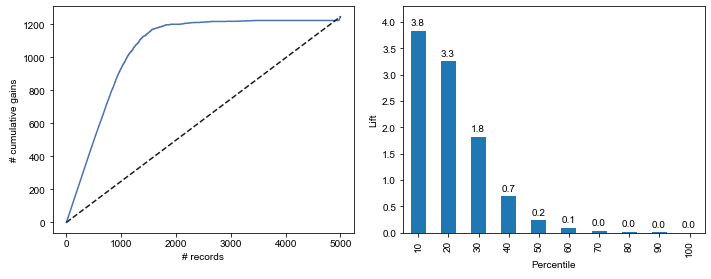

In [16]:
###Converting to probabilities

logit_reg_pred = logit_reg.predict_proba(valid_X)
full_result = pd.DataFrame({'actual': valid_y, 
                            'p(0)': [p[0] for p in logit_reg_pred],
                            'p(1)': [p[1] for p in logit_reg_pred],
                            'predicted': logit_reg.predict(valid_X)})
full_result = full_result.sort_values(by=['p(1)'], ascending=False)


df =full_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(df.actual, ax=axes[0])
liftChart(df['p(1)'], title=False, ax=axes[1])
    
plt.tight_layout()
sns.set(font_scale = 1)
plt.show()

In [17]:
pred_proba_df = pd.DataFrame(logit_reg.predict_proba(valid_X)) # Probabilities for some predictions
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99] # cutoffs
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = accuracy_score(valid_y,Y_test_pred.iloc[:,1].values)
    print('Our testing accuracy is {}'.format(test_accuracy))
#different cutoffs and we see the results 
    print(classificationSummary(valid_y,Y_test_pred.iloc[:,1].values))


******** For i = 0.05 ******
Our testing accuracy is 0.776
Confusion Matrix (Accuracy 0.7760)

       Prediction
Actual    0    1
     0 2669 1084
     1   36 1211
None

******** For i = 0.1 ******
Our testing accuracy is 0.8406
Confusion Matrix (Accuracy 0.8406)

       Prediction
Actual    0    1
     0 3002  751
     1   46 1201
None

******** For i = 0.15 ******
Our testing accuracy is 0.8704
Confusion Matrix (Accuracy 0.8704)

       Prediction
Actual    0    1
     0 3158  595
     1   53 1194
None

******** For i = 0.2 ******
Our testing accuracy is 0.8904
Confusion Matrix (Accuracy 0.8904)

       Prediction
Actual    0    1
     0 3272  481
     1   67 1180
None

******** For i = 0.25 ******
Our testing accuracy is 0.907
Confusion Matrix (Accuracy 0.9070)

       Prediction
Actual    0    1
     0 3377  376
     1   89 1158
None

******** For i = 0.3 ******
Our testing accuracy is 0.915
Confusion Matrix (Accuracy 0.9150)

       Prediction
Actual    0    1
     0 3442  311
  

In [18]:
# Evaluating the validation data of the model. 
# Logistic 
classificationSummary(valid_y, logit_reg.predict(valid_X))

precision_valid_l = precision_score(valid_y, logit_reg.predict(valid_X)) # logit_reg.predict
recall_valid_l = recall_score(valid_y, logit_reg.predict(valid_X))
f1_valid_l = f1_score(valid_y, logit_reg.predict(valid_X))

print('Precision_logit_test: ', precision_valid_l)
print('Recall_logit_test: ', recall_valid_l)
print('F1_logit_test:', f1_valid_l)

Confusion Matrix (Accuracy 0.9284)

       Prediction
Actual    0    1
     0 3607  146
     1  212 1035
Precision_logit_test:  0.8763759525825572
Recall_logit_test:  0.8299919807538091
F1_logit_test: 0.8525535420098848


# KNN¶
FOR KNN it is important to scale the data before running the model

In [19]:
# I am going to dummify the variables to use them in the model

X_traind = pd.get_dummies(train_X, prefix_sep='_', drop_first=False)
X_validd =  pd.get_dummies(valid_X, prefix_sep='_', drop_first=False)

In [20]:
X_traind

,LightConditionCde_1,LightConditionCde_2,LightConditionCde_3,LightConditionCde_4,LightConditionCde_5,LightConditionCde_6,WeatherConditionCde_0,WeatherConditionCde_1,WeatherConditionCde_2,WeatherConditionCde_3,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
5795,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1708,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
915,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14794,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
17873,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3258,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
10250,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2865,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2568,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [21]:
# Just observing the new variables
X_validd

,LightConditionCde_1,LightConditionCde_2,LightConditionCde_3,LightConditionCde_4,LightConditionCde_5,LightConditionCde_6,WeatherConditionCde_0,WeatherConditionCde_1,WeatherConditionCde_2,WeatherConditionCde_3,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
16605,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
11377,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
12703,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1395,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
13503,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15239,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6032,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19392,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5050,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
scaler = preprocessing.StandardScaler()

In [23]:
# Scaling the data of to use KNN

scaler.fit(X_traind)
X_trainK = scaler.transform(X_traind)
X_validK = scaler.transform(X_validd)

In [24]:
# Running the KNN algorithm
classifier =  KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_trainK, train_y)

KNeighborsClassifier()

In [25]:
# Obtaining the predicted variables
y_pred = classifier.predict(X_validK)

In [26]:
# Getting the results of the model
confusion_matrix(valid_y, y_pred)
print(confusion_matrix(valid_y, y_pred))
print('Accuracy :', accuracy_score(valid_y, y_pred))

[[3573  180]
 [  13 1234]]
Accuracy : 0.9614


In [27]:
# Train a classifier for different values of k
results = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_trainK, train_y)
    results.append({
        'k': k,
        'accuracy': accuracy_score(valid_y, knn.predict(X_validK))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
results

,k,accuracy
0,1,0.9618
1,3,0.9612
2,5,0.9614
3,7,0.9590
4,9,0.9566
5,11,0.9506
6,13,0.9484
7,15,0.9456
8,17,0.9398
9,19,0.9358


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


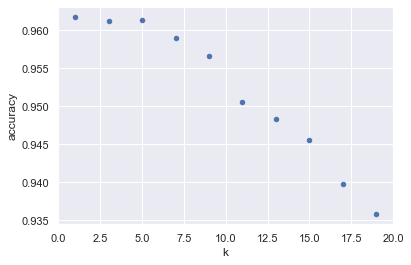

In [28]:
# plot accuracy vs. k
_ = results.plot.scatter(x='k', y='accuracy', xlim=[0, 20])

In [29]:
# Using the best K
classifier1 =  KNeighborsClassifier(n_neighbors = 3)
classifier1.fit(X_trainK, train_y)

KNeighborsClassifier(n_neighbors=3)

In [30]:
# Obtaining the predicted variables
y_pred1 = classifier1.predict(X_validK)

In [31]:
# Getting the results of the model
confusion_matrix(valid_y, y_pred1)
print(confusion_matrix(valid_y, y_pred1))
print('Accuracy :', accuracy_score(valid_y, y_pred1))

[[3578  175]
 [  19 1228]]
Accuracy : 0.9612


In [32]:

classificationSummary(valid_y,  classifier1.predict(X_validK))
precision_valid_k = precision_score(valid_y,  classifier1.predict(X_validK)) # logit_reg.predict
recall_valid_k = recall_score(valid_y,  classifier1.predict(X_validK))
f1_valid_k = f1_score(valid_y,  classifier1.predict(X_validK))

print('Precision_logit_test: ', precision_valid_k)
print('Recall_logit_test: ', recall_valid_k)
print('F1_logit_test:', f1_valid_k)

Confusion Matrix (Accuracy 0.9612)

       Prediction
Actual    0    1
     0 3578  175
     1   19 1228
Precision_logit_test:  0.8752672843905915
Recall_logit_test:  0.9847634322373697
F1_logit_test: 0.9267924528301886


# Classification Tree

In [33]:
# Naming each category appropiately 
#train_XT['LightConditionCde'] = train_XT['LightConditionCde'].cat.rename_categories({'Daylight', 'Dawn', 'Dusk', 'Dark-Road_Lighted',  'Dark-Road_Unlighted', 'Other'})
#train_XT['WeatherConditionCde'] = train_XT['WeatherConditionCde'].cat.rename_categories({'Other', 'Clear', 'Cloudy', 'Rain',  'Snow', 'FreezingRain','Fog', 'Unknown'})
#train_XT['RoadwayCharacteristicsCde'] = train_XT['RoadwayCharacteristicsCde'].cat.rename_categories({'Straight_Level', 'Straight_Grade', 'Straight_Hillcrest', 'Curve_level',  'Curve_Grade', 'Curve_hillcrest', 'Other'})
#train_XT['RoadSurfaceConditionsCde'] =train_XT['RoadSurfaceConditionsCde'].cat.rename_categories({'Other', 'Dry', 'Wet' ,'Muddy', 'Snow', 'Slush', 'Flooded_Water'})
#train_XT['TrafficControlCde'] = train_XT['TrafficControlCde'].cat.rename_categories({'None', 'Traffic_Signal', 'Stop_Sign', 'Flashing_Light',  'Yield_Sign', 'Officer', 'No_passing', 'rr_crossing', 'rr_flashing', 'rr_gate', 'Stop_School_Bus', 'Highway_Work', 'Maintance_work', 'Utility_work', 'Police', 'School_zone', 'Other'})
#train_XT['Month'] = train_XT['Month'].cat.rename_categories({'Jan', 'Feb', 'Mar', 'Apr',  'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'})

In [34]:
# Naming each category appropiately 
#valid_XT['LightConditionCde'] =valid_XT['LightConditionCde'].cat.rename_categories({'Daylight', 'Dawn', 'Dusk', 'Dark-Road_Lighted',  'Dark-Road_Unlighted', 'Other'})
#valid_XT['WeatherConditionCde'] = valid_XT['WeatherConditionCde'].cat.rename_categories({'Other', 'Clear', 'Cloudy', 'Rain',  'Snow', 'FreezingRain','Fog', 'Unknown'})
#valid_XT['RoadwayCharacteristicsCde'] =valid_XT['RoadwayCharacteristicsCde'].cat.rename_categories({'Straight_Level', 'Straight_Grade', 'Straight_Hillcrest', 'Curve_level',  'Curve_Grade', 'Curve_hillcrest', 'Other'})
#valid_XT['RoadSurfaceConditionsCde'] =valid_XT['RoadSurfaceConditionsCde'].cat.rename_categories({'Other', 'Dry', 'Wet' ,'Muddy', 'Snow', 'Slush', 'Flooded_Water'})
#valid_XT['TrafficControlCde'] =valid_XT['TrafficControlCde'].cat.rename_categories({'None', 'Traffic_Signal', 'Stop_Sign', 'Flashing_Light',  'Yield_Sign', 'Officer', 'No_passing', 'rr_crossing', 'rr_flashing', 'rr_gate', 'Stop_School_Bus', 'Highway_Work', 'Maintance_work', 'Utility_work', 'Police', 'School_zone', 'Other'})
#valid_XT['Month'] = valid_XT['Month'].cat.rename_categories({'Jan', 'Feb', 'Mar', 'Apr',  'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'})

In [35]:
train_XT = train_X
valid_XT = valid_X

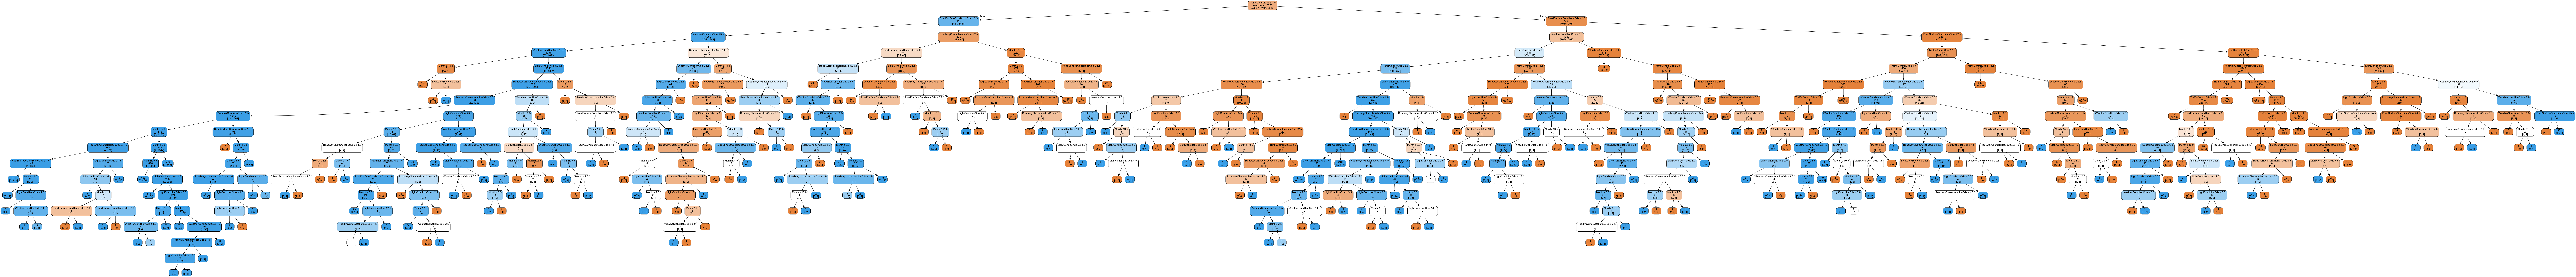

In [36]:
fullClassTree = DecisionTreeClassifier()
fullClassTree.fit(train_X, train_y)

plotDecisionTree(fullClassTree, feature_names=train_X.columns)

In [37]:
classificationSummary(train_y, fullClassTree.predict(train_X))
classificationSummary(valid_y, fullClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.9991)

       Prediction
Actual    0    1
     0 7478    6
     1    3 2513
Confusion Matrix (Accuracy 0.9810)

       Prediction
Actual    0    1
     0 3702   51
     1   44 1203


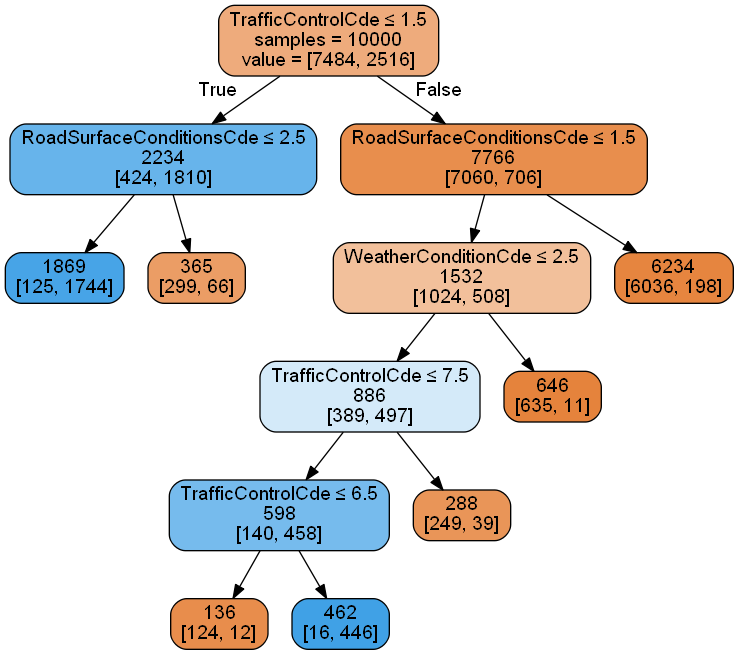

In [38]:
smallClassTree = DecisionTreeClassifier(max_depth=30, min_samples_split=20, min_impurity_decrease=0.01)
smallClassTree.fit(train_X, train_y)

plotDecisionTree(smallClassTree, feature_names=train_X.columns)
# Minimun split not less than 20
# Significant impurity decreas

In [39]:
classificationSummary(train_y, smallClassTree.predict(train_X))
classificationSummary(valid_y, smallClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.9533)

       Prediction
Actual    0    1
     0 7343  141
     1  326 2190
Confusion Matrix (Accuracy 0.9560)

       Prediction
Actual    0    1
     0 3705   48
     1  172 1075


In [40]:
#
# GRID SEARCH
#


# Start with an initial guess for parameters
param_grid = {
    'max_depth': [10, 20, 30, 40], 
    'min_samples_split': [20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

# Adapt grid based on result from initial grid search
param_grid = {
    'max_depth': list(range(2, 16)), 
    'min_samples_split': list(range(10, 22)), 
    'min_impurity_decrease': [0.0009, 0.001, 0.0011], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

bestClassTree = gridSearch.best_estimator_
bestClassTree

Initial score:  0.9796000000000001
Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 20}
Improved score:  0.9743
Improved parameters:  {'max_depth': 7, 'min_impurity_decrease': 0.001, 'min_samples_split': 10}


DecisionTreeClassifier(max_depth=7, min_impurity_decrease=0.001,
                       min_samples_split=10)

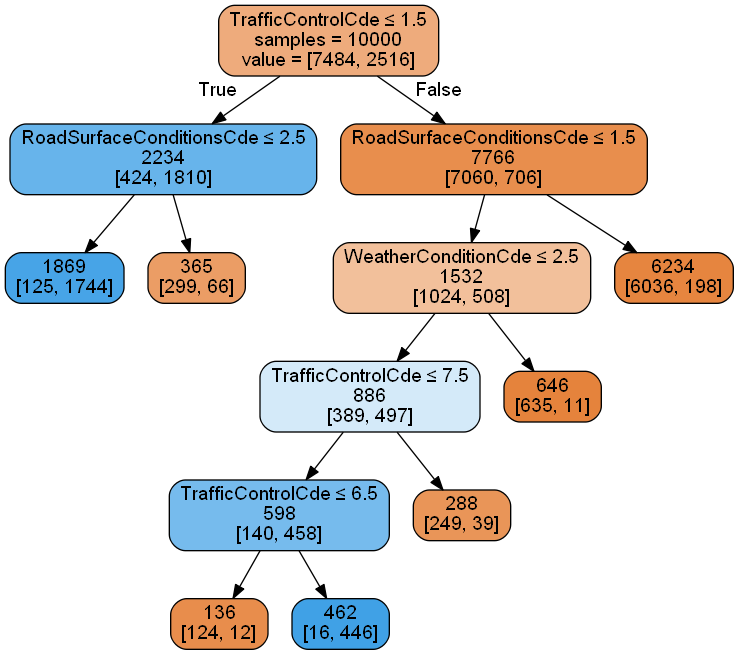

In [41]:
FirstClassTree = DecisionTreeClassifier(max_depth=7, min_samples_split=10, min_impurity_decrease=0.0009)
FirstClassTree.fit(train_X, train_y)

plotDecisionTree(smallClassTree, feature_names=train_X.columns)

In [42]:
classificationSummary(train_y, FirstClassTree.predict(train_X))
classificationSummary(valid_y, FirstClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.9771)

       Prediction
Actual    0    1
     0 7367  117
     1  112 2404
Confusion Matrix (Accuracy 0.9768)

       Prediction
Actual    0    1
     0 3696   57
     1   59 1188


In [43]:
#Evaluating the validation data
classificationSummary(valid_y,  FirstClassTree.predict(valid_XT))

precision_valid_tree = precision_score(valid_y,  FirstClassTree.predict(valid_XT)) # logit_reg.predict
recall_valid_tree = recall_score(valid_y, FirstClassTree.predict(valid_XT))
f1_valid_tree = f1_score(valid_y,  FirstClassTree.predict(valid_XT))

print('Precision_logit_test: ', precision_valid_tree)
print('Recall_logit_test: ', recall_valid_tree)
print('F1_logit_test:', f1_valid_tree)

Confusion Matrix (Accuracy 0.9768)

       Prediction
Actual    0    1
     0 3696   57
     1   59 1188
Precision_logit_test:  0.9542168674698795
Recall_logit_test:  0.9526864474739375
F1_logit_test: 0.9534510433386838


# Random Forest

In [44]:
rf = RandomForestClassifier(n_estimators=500, random_state=42) # random state replicated or random. Random state replicated
rf.fit(train_X, train_y)

RandomForestClassifier(n_estimators=500, random_state=42)

In [45]:
# We can see it is overfitting I will run the 

estimator_options =  [500,1000,1500]

for i in estimator_options:
    rf = RandomForestClassifier(n_estimators= i, random_state=42) # random state replicated or random. Random state replicated
    rf.fit(train_X, train_y)
    classificationSummary(train_y, rf.predict(train_X))

Confusion Matrix (Accuracy 0.9991)

       Prediction
Actual    0    1
     0 7476    8
     1    1 2515
Confusion Matrix (Accuracy 0.9991)

       Prediction
Actual    0    1
     0 7476    8
     1    1 2515
Confusion Matrix (Accuracy 0.9991)

       Prediction
Actual    0    1
     0 7476    8
     1    1 2515


In [46]:
estimator_options =  [500,1000,1500]

for i in estimator_options:
    rf = RandomForestClassifier(n_estimators= i, random_state=1) # random state replicated or random. Random state replicated
    rf.fit(train_X, train_y)
    classificationSummary(valid_y, rf.predict(valid_X))

Confusion Matrix (Accuracy 0.9858)

       Prediction
Actual    0    1
     0 3728   25
     1   46 1201
Confusion Matrix (Accuracy 0.9858)

       Prediction
Actual    0    1
     0 3727   26
     1   45 1202
Confusion Matrix (Accuracy 0.9862)

       Prediction
Actual    0    1
     0 3729   24
     1   45 1202


                     feature  importance       std
5                      Month    0.033978  0.005995
0          LightConditionCde    0.055280  0.022782
1        WeatherConditionCde    0.136745  0.065211
2  RoadwayCharacteristicsCde    0.142282  0.092431
3   RoadSurfaceConditionsCde    0.249469  0.122470
4          TrafficControlCde    0.382247  0.172971


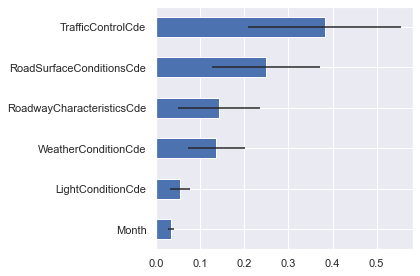

In [47]:
#variable importance plot

sns.set(font_scale = 1)


importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': train_X.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [48]:
# Verifying if it is overfitting
print(classificationSummary(train_y, rf.predict(train_X)))
classificationSummary(valid_y, rf.predict(valid_X)) 

Confusion Matrix (Accuracy 0.9991)

       Prediction
Actual    0    1
     0 7476    8
     1    1 2515
None
Confusion Matrix (Accuracy 0.9862)

       Prediction
Actual    0    1
     0 3729   24
     1   45 1202


In [49]:
# Running the Grid to determine the best classifier

rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(train_X, train_y)

CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [50]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')

In [51]:
rfc1.fit(train_X, train_y)

RandomForestClassifier(max_depth=8, n_estimators=200, random_state=42)

In [52]:
pred=rfc1.predict(valid_X)

In [53]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(valid_y,pred))

Accuracy for Random Forest on CV data:  0.9836


# Gradient Boosting

In [54]:
# Boosting Classifier

boost = GradientBoostingClassifier()
boost.fit(train_X, train_y)
print(classificationSummary(train_y, boost.predict(train_X)))
classificationSummary(valid_y, boost.predict(valid_X))

Confusion Matrix (Accuracy 0.9855)

       Prediction
Actual    0    1
     0 7415   69
     1   76 2440
None
Confusion Matrix (Accuracy 0.9846)

       Prediction
Actual    0    1
     0 3715   38
     1   39 1208


# Testing the models

In [55]:
################# Logistic Regression#######################################
# Evaluating the validation data of the model. 
# Logistic 
classificationSummary(test_y, logit_reg.predict(test_X))

precisiontestL = precision_score(test_y, logit_reg.predict(test_X)) # logit_reg.predict
recalltestL = recall_score(test_y, logit_reg.predict(test_X))
f1testL = f1_score(test_y, logit_reg.predict(test_X))

print('Precision Logistic: ', precisiontestL )
print('Recall Logistic: ', recalltestL)
print('F1 Logistic:', f1testL)

Confusion Matrix (Accuracy 0.9368)

       Prediction
Actual    0    1
     0 3622  141
     1  175 1062
Precision Logistic:  0.8827930174563591
Recall Logistic:  0.8585286984640259
F1 Logistic: 0.8704918032786887


In [56]:
############################KNN###################################
X_testd = pd.get_dummies(test_X, prefix_sep='_', drop_first=False)
X_testK = scaler.transform(X_testd)


classificationSummary(test_y,  classifier1.predict(X_testK))
precisiontestk = precision_score(test_y,  classifier1.predict(X_testK)) # logit_reg.predict
recalltestk = recall_score(test_y,  classifier1.predict(X_validK))
f1testk = f1_score(test_y,  classifier1.predict(X_testK))

print('Precision KNN: ', precisiontestk)
print('Recall KNN: ', recalltestk )
print('F1 KNN:', f1testk)

Confusion Matrix (Accuracy 0.9580)

       Prediction
Actual    0    1
     0 3570  193
     1   17 1220
Precision KNN:  0.8634111818825194
Recall KNN:  0.2974939369442199
F1 KNN: 0.920754716981132


In [57]:
# ###########################Decision Tree###############################

#Evaluating the validation data
classificationSummary(test_y,  FirstClassTree.predict(test_X))

precisionTree = precision_score(test_y,  FirstClassTree.predict(test_X)) # logit_reg.predict
recallTree = recall_score(test_y, FirstClassTree.predict(test_X))
f1Tree = f1_score(test_y,  FirstClassTree.predict(test_X))

print('Precision_logit_test: ', precisionTree)
print('Recall_logit_test: ', recallTree)
print('F1_logit_test:', f1Tree)

Confusion Matrix (Accuracy 0.9774)

       Prediction
Actual    0    1
     0 3702   61
     1   52 1185
Precision_logit_test:  0.9510433386837881
Recall_logit_test:  0.957962813257882
F1_logit_test: 0.9544905356423682


In [58]:
###########################Random Forest###############################

#Evaluating the validation data
classificationSummary(test_y,  rfc1.predict(test_X))

precisionForest = precision_score(test_y,  rfc1.predict(test_X)) # logit_reg.predict
recallForest = recall_score(test_y, rfc1.predict(test_X))
f1Forest = f1_score(test_y,  rfc1.predict(test_X))

print('Precision Forest: ', precisionForest)
print('Recall Forest: ', recallForest)
print('F1 Forest:', f1Forest)


Confusion Matrix (Accuracy 0.9844)

       Prediction
Actual    0    1
     0 3736   27
     1   51 1186
Precision Forest:  0.9777411376751854
Recall Forest:  0.9587712206952304
F1 Forest: 0.9681632653061224


In [60]:
###########################Gradient Boosting###############################
#Evaluating the validation data
classificationSummary(test_y,  boost.predict(test_X))

precisionBoost = precision_score(test_y, boost.predict(test_X)) # logit_reg.predict
recallBoost = recall_score(test_y, boost.predict(test_X))
f1Boost = f1_score(test_y,  boost.predict(test_X))

print('Precision Boosting: ', precisionBoost)
print('Recall Boosting: ', recallBoost)
print('F1 Boosting:', f1Boost )


Confusion Matrix (Accuracy 0.9852)

       Prediction
Actual    0    1
     0 3724   39
     1   35 1202
Precision Boosting:  0.9685737308622079
Recall Boosting:  0.9717057396928052
F1 Boosting: 0.9701372074253429
